In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [3]:
df = pd.read_csv('../Sleep_health_and_lifestyle_dataset.csv')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


## Описание набора данных  
*   **Предметная область:** Здравоохранение, образ жизни и сон.
*   **Источник данных:** https://www.kaggle.com/datasets/mdsultanulislamovi/sleep-disorder-diagnosis-dataset/data.
*   **Характер данных:** Набор данных представлен как сборник показателей сна и образа жизни. Точный источник и метод сбора не указаны. Данные демонстрируют признаки как реальных медицинских показателей, так и возможной обработки.
*   **Атрибуты**:
      * Person ID - Уникальный идентификатор человека (числовой, целочисленный)
      * Gender - Пол: Male - мужской, Female - женский (строковый, категориальный)
      * Age - Возраст (годы) (числовой, целочисленный)
      * Occupation - Профессия, сфера деятельности (числовой, целочисленный)
      * Sleep Duration - Продолжительность сна (часы) (числовой, непрерывный)
      * Quality of Sleep - Качество сна по шкале 1-10 (числовой, дискретный)
      * Physical Activity Level - Уровень физической активности (минуты/день) (числовой, целочисленный)
      * Stress Level - Уровень стресса по шкале 1-10 (числовой, дискретный)
      * BMI Category - Категория ИМТ (индекс массы тела): Normal, Overweight, Obese
      * Blood Pressure - Артериальное давление в формате "систолическое/диастолическое" (строковый, составной)
      * Heart Rate - Частота сердечных сокращений (уд/мин) (числовой, целочисленный)
      * Daily Steps	- Количество шагов в день (числовой, целочисленный)	
      * Sleep Disorder - Наличие расстройства сна: None, Insomnia, Sleep Apnea (строковый, категориальный)
* **Задача анализа**: явная задача анализа не сформулирована в описании датасета, однако наличие таких атрибутов как Sleep Disorder, Quality of Sleep и Stress Level предполагает возможность решения задач классификации и регрессии для медицинской диагностики.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Анализ атрибутов:
* Для числовых данных - гистограммы
* Для катергориальных данных - столбчатые диаграммы


Анализ атрибута: Gender
Тип данных: object
Пропущенные значения: 0
Предложение: обработка не требуется
Уникальных значений: 2


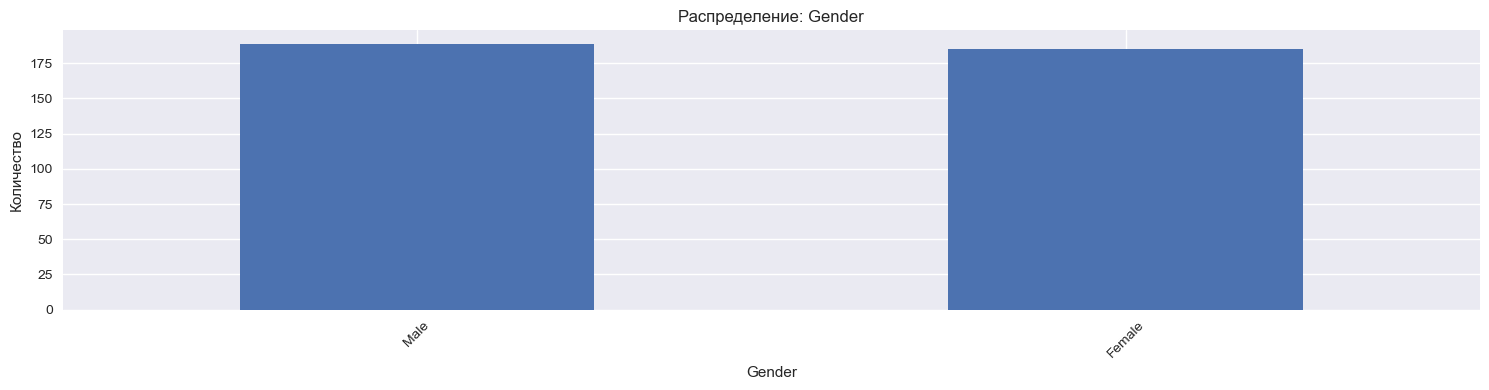


Анализ атрибута: Age
Тип данных: int64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 42.18
Стандартное откложение (СКО): 8.67
Выбросы (IQR метод): 0 значений


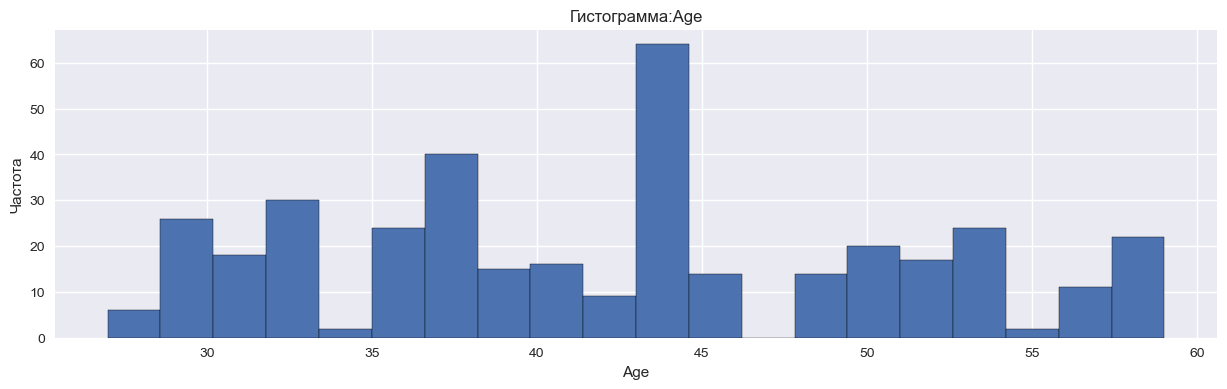


Анализ атрибута: Occupation
Тип данных: object
Пропущенные значения: 0
Предложение: обработка не требуется
Уникальных значений: 11


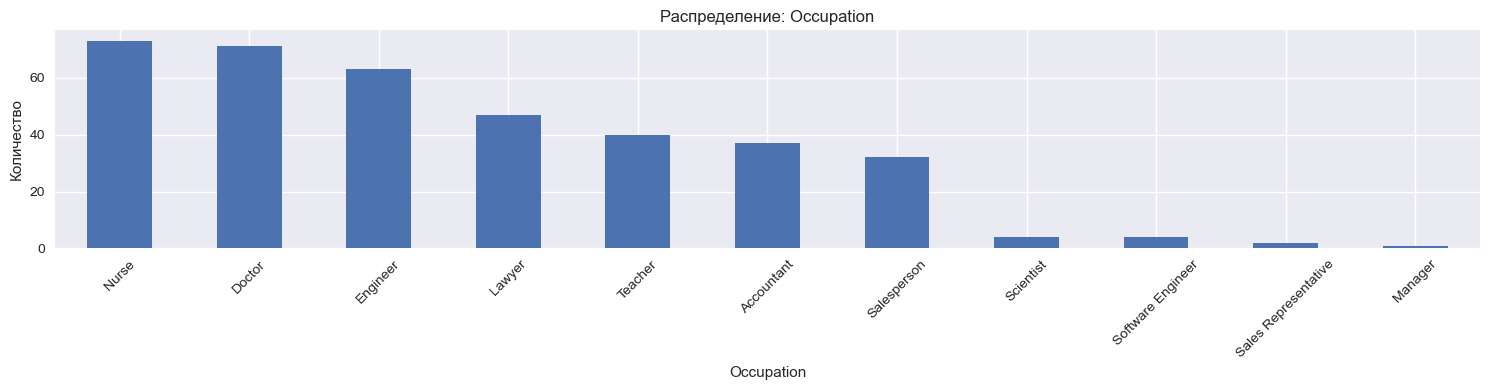


Анализ атрибута: Sleep Duration
Тип данных: float64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 7.13
Стандартное откложение (СКО): 0.8
Выбросы (IQR метод): 0 значений


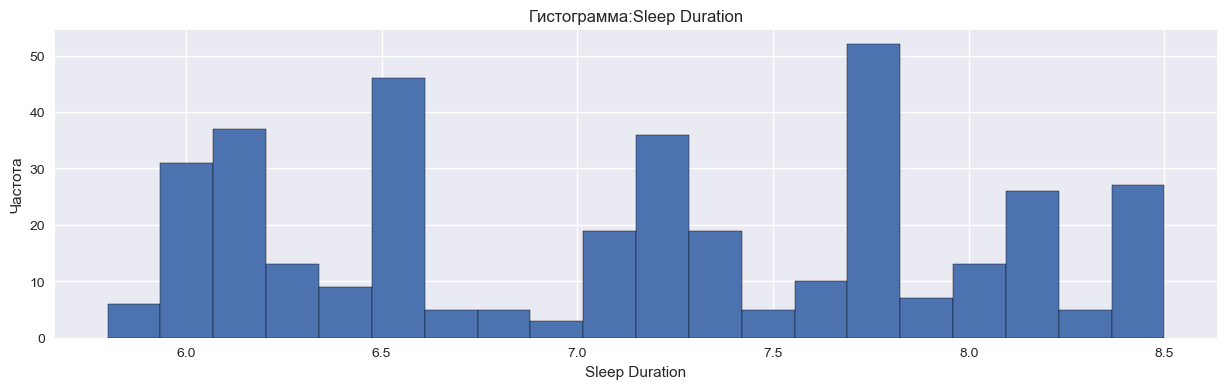


Анализ атрибута: Quality of Sleep
Тип данных: int64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 7.31
Стандартное откложение (СКО): 1.2
Выбросы (IQR метод): 0 значений


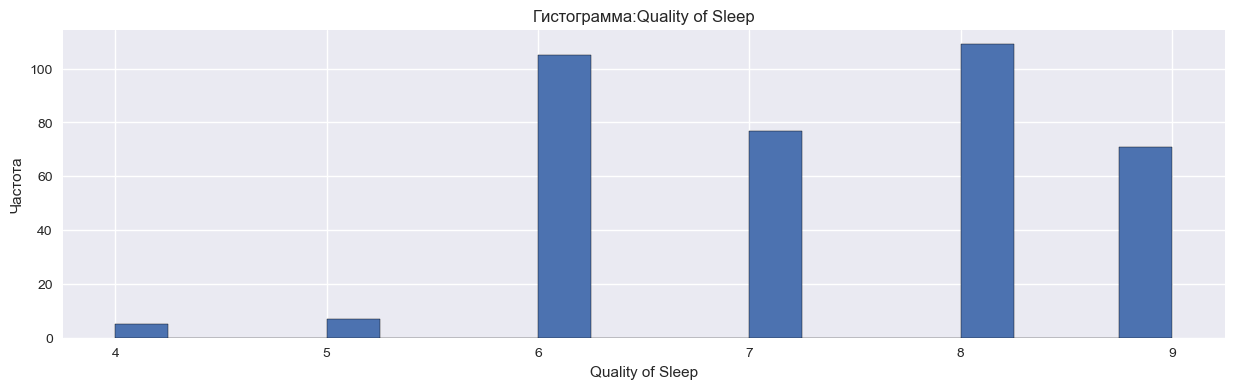


Анализ атрибута: Physical Activity Level
Тип данных: int64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 59.17
Стандартное откложение (СКО): 20.83
Выбросы (IQR метод): 0 значений


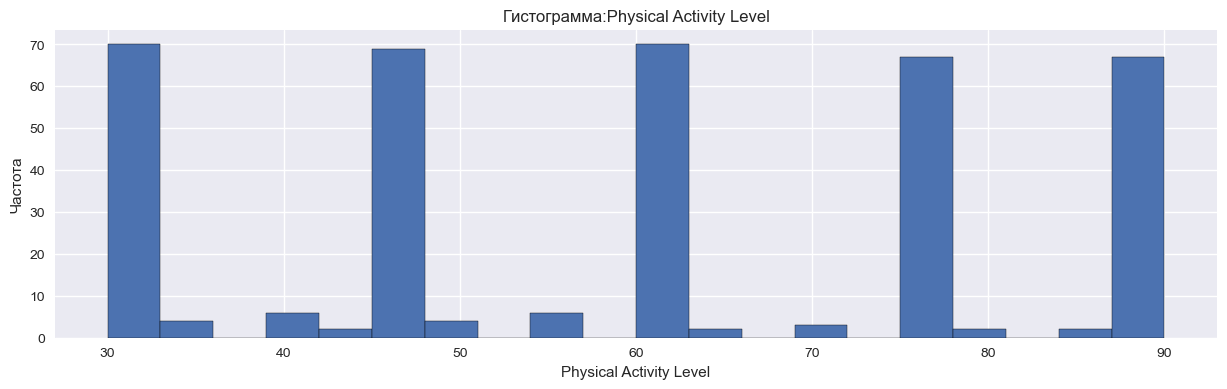


Анализ атрибута: Stress Level
Тип данных: int64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 5.39
Стандартное откложение (СКО): 1.77
Выбросы (IQR метод): 0 значений


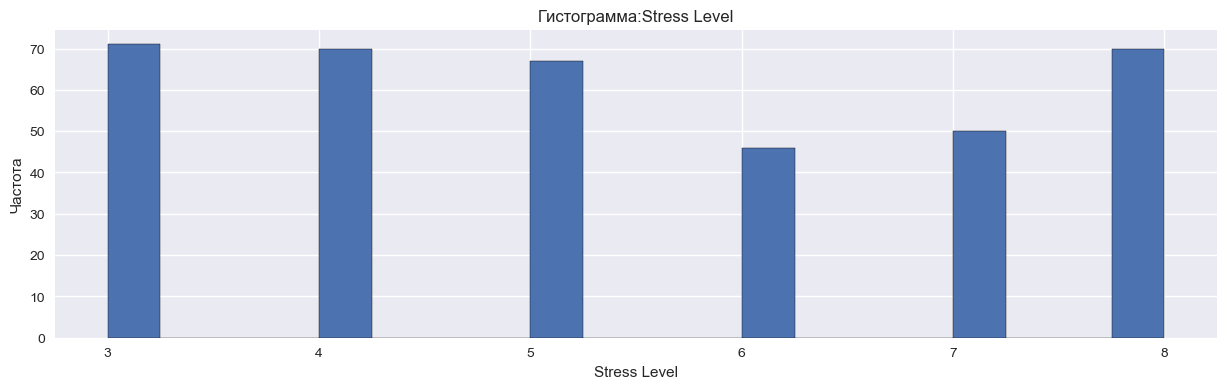


Анализ атрибута: BMI Category
Тип данных: object
Пропущенные значения: 0
Предложение: обработка не требуется
Уникальных значений: 4


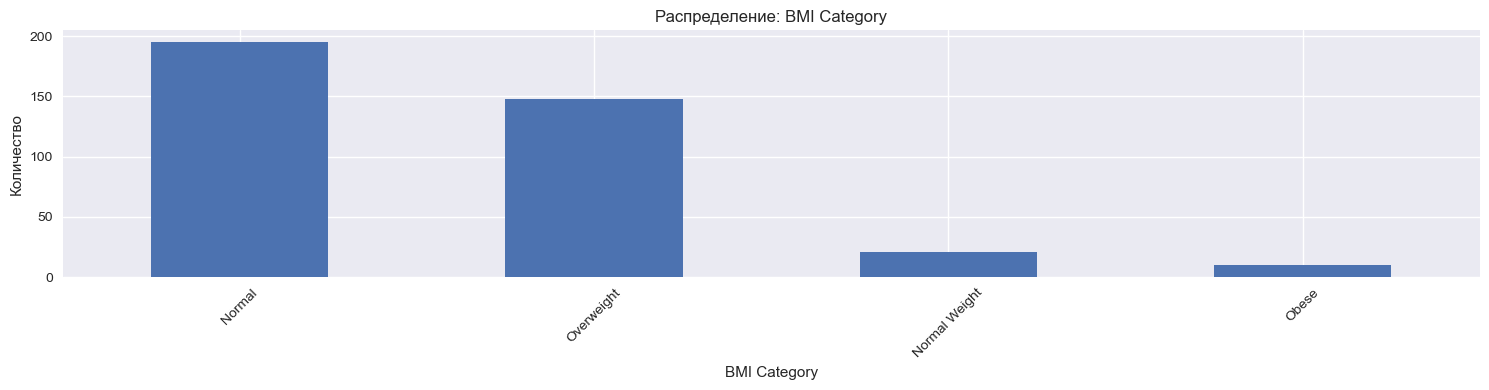


Анализ атрибута: Blood Pressure
Тип данных: object
Пропущенные значения: 0
Предложение: обработка не требуется
Уникальных значений: 25


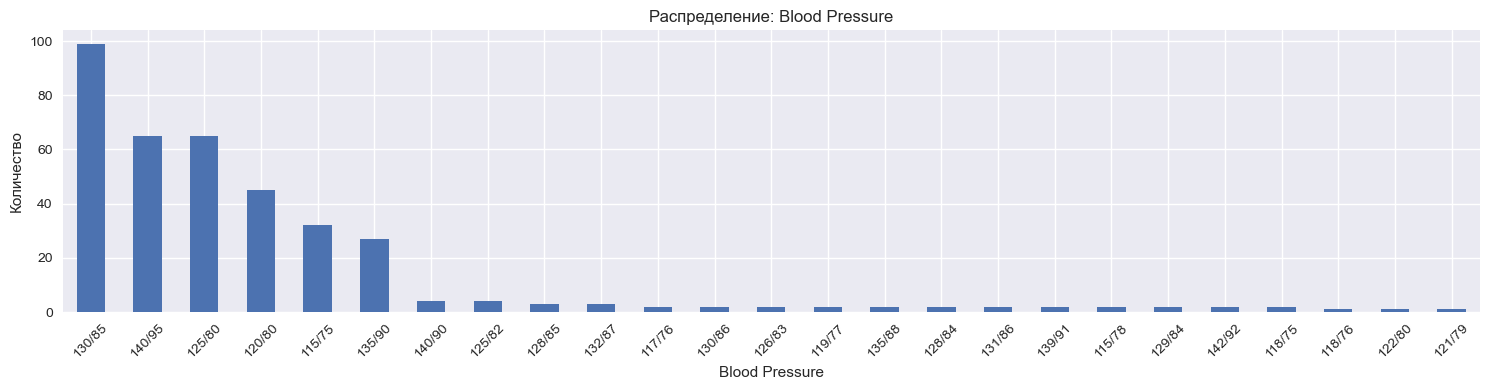


Анализ атрибута: Heart Rate
Тип данных: int64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 70.17
Стандартное откложение (СКО): 4.14
Выбросы (IQR метод): 15 значений


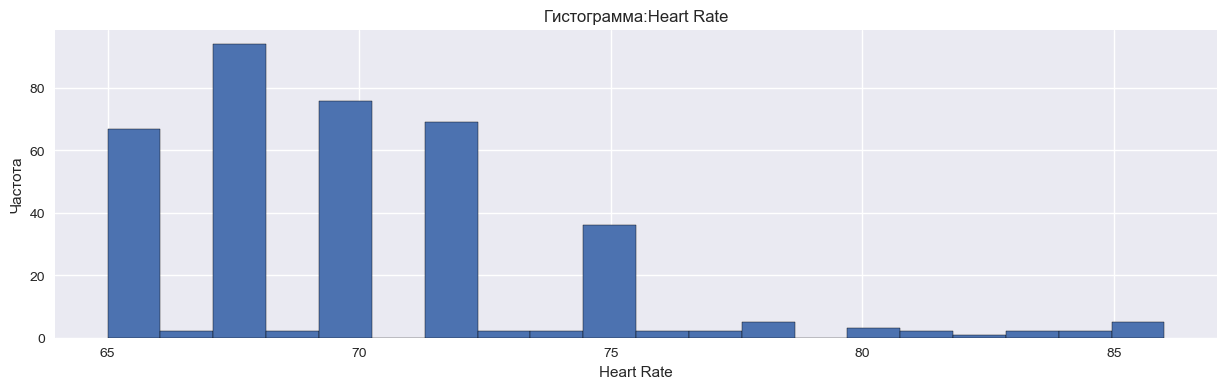


Анализ атрибута: Daily Steps
Тип данных: int64
Пропущенные значения: 0
Предложение: обработка не требуется
Среднее значение: 6816.84
Стандартное откложение (СКО): 1617.92
Выбросы (IQR метод): 0 значений


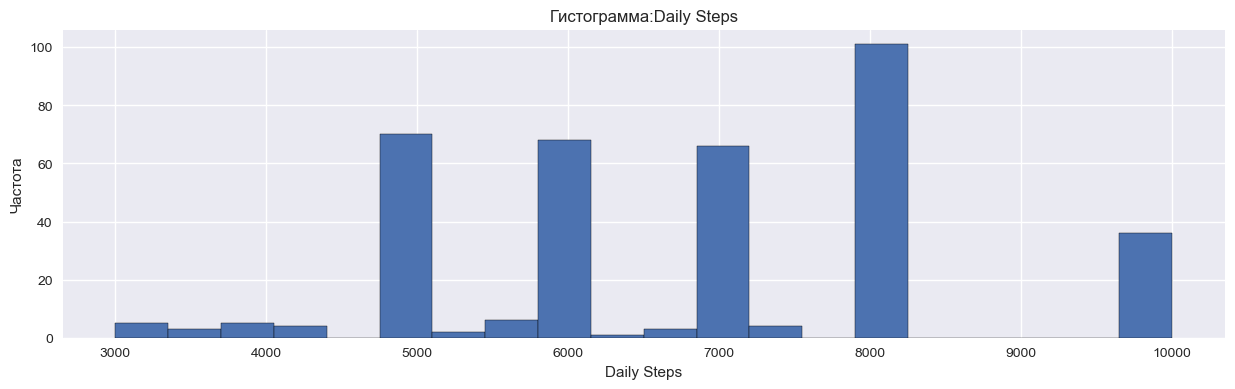


Анализ атрибута: Sleep Disorder
Тип данных: object
Пропущенные значения: 0
Предложение: обработка не требуется
Уникальных значений: 3


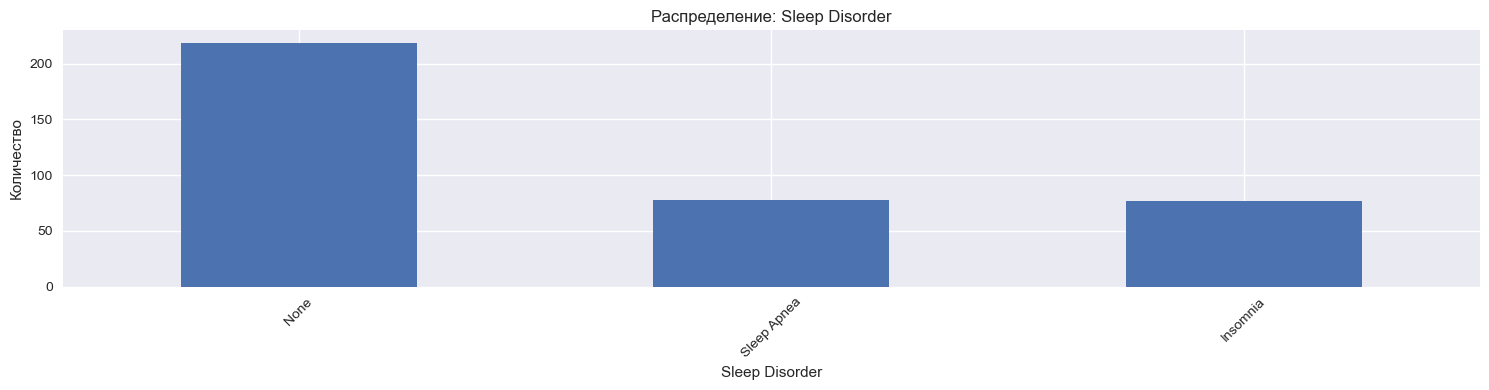

In [16]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

for column in df.columns[1:]:
    print('\nАнализ атрибута:', column)
    print('Тип данных:', df[column].dtype)
    missing_count = df[column].isnull().sum()
    print('Пропущенные значения:', missing_count)
    if missing_count > 0:
        if df[column].dtype in ['int64', 'float64']:
            print('Предложение: заполнить средним значением')
        else:
            print('Предложение: заполнить модой (наиболее частым значением)')
    else:
        print('Предложение: обработка не требуется')

    if df[column].dtype in ['int64', 'float64']:
        print('Среднее значение:', round(df[column].mean(), 2))
        print('Стандартное откложение (СКО):', round(df[column].std(), 2))

        # Анализ выбросов по IQR методу 
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        outliers = df[(df[column] < lower) | (df[column] > upper)]
        print('Выбросы (IQR метод):', len(outliers), 'значений')
        
        plt.figure(figsize=(15, 4))
        df[column].hist(bins=20, edgecolor='black', alpha=1.0)
        plt.title('Гистограмма:' + column)
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()
    else:
        print('Уникальных значений:', df[column].nunique())
        plt.figure(figsize=(15, 4))
        df[column].value_counts().plot(kind='bar')
        plt.title('Распределение: ' + column)
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Корреляционный анализ: (только числовые данные)

Числовые атрибуты для анализа корреляции:
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Матрица корреляций:
                         Person ID   Age  Sleep Duration  Quality of Sleep  \
Person ID                     1.00  0.99            0.30              0.43   
Age                           0.99  1.00            0.34              0.47   
Sleep Duration                0.30  0.34            1.00              0.88   
Quality of Sleep              0.43  0.47            0.88              1.00   
Physical Activity Level       0.15  0.18            0.21              0.19   
Stress Level                 -0.39 -0.42           -0.81             -0.90   
Heart Rate                   -0.23 -0.23           -0.52             -0.66   
Daily Steps                   0.04  0.06           -0.04              0.02   

                         Physical Activity Level  Stress Level  Heart Rate  \
Person ID                

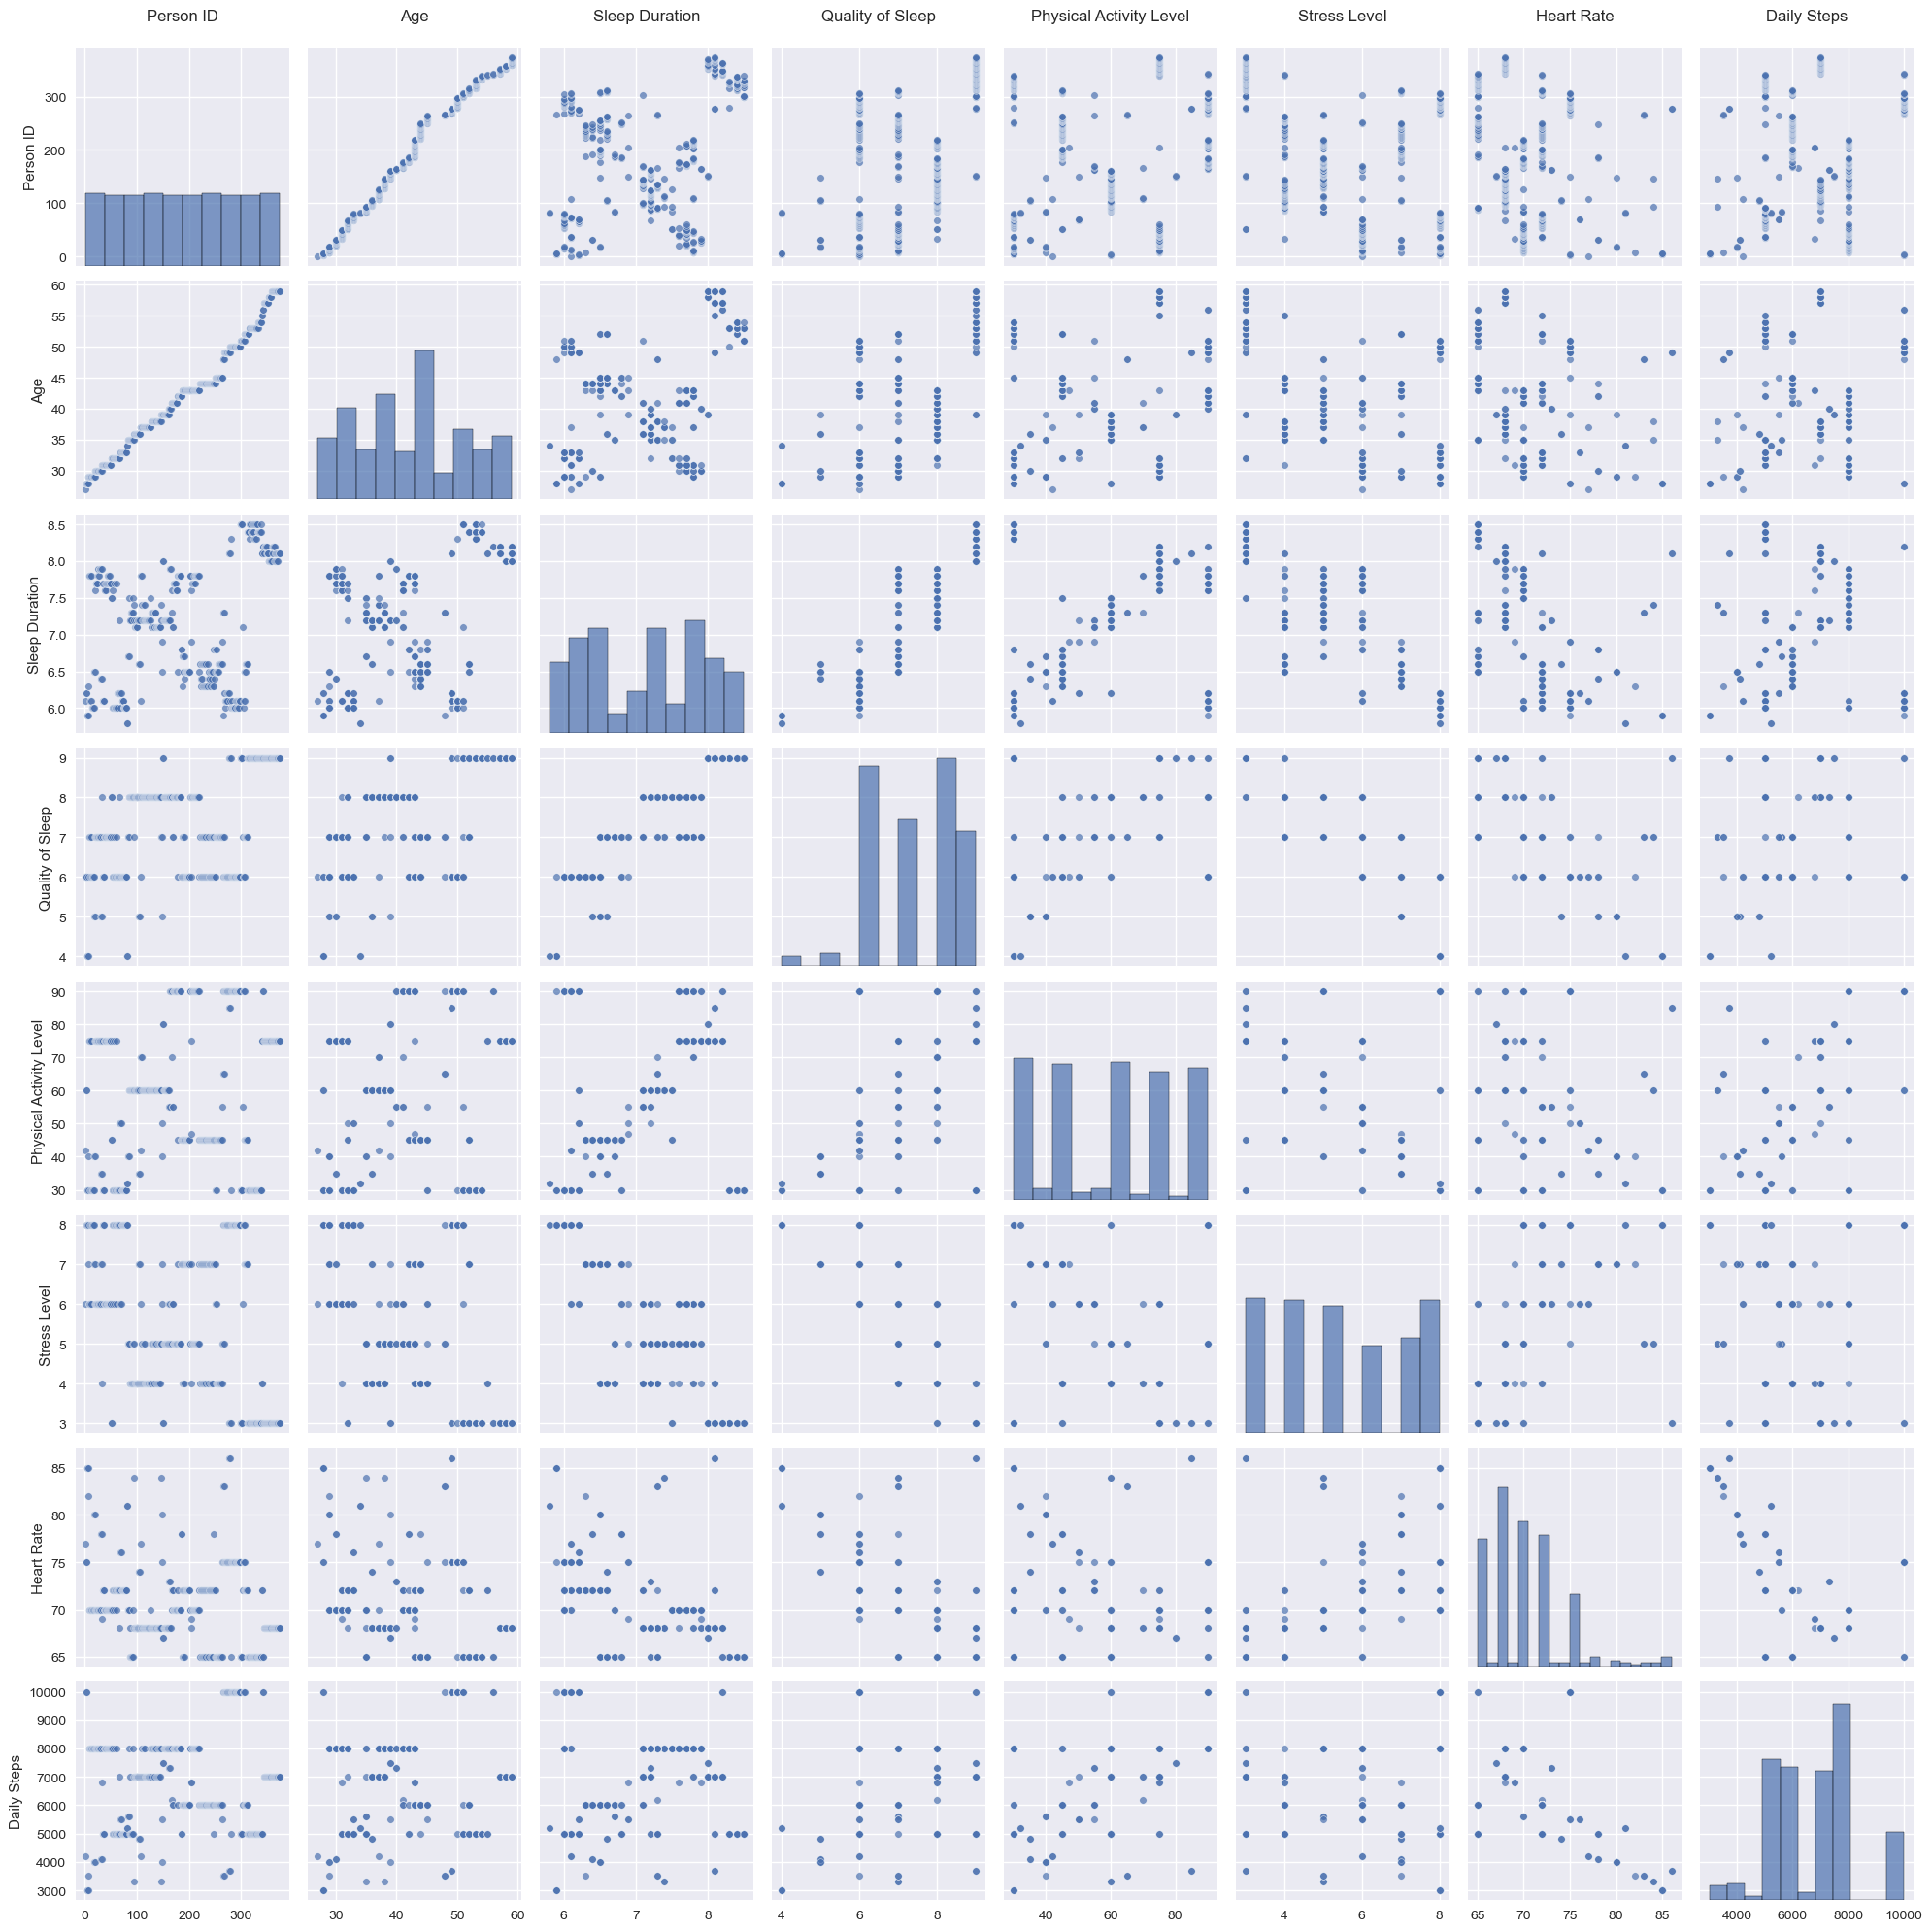

In [17]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]
print("Числовые атрибуты для анализа корреляции:")
print(list(numeric_columns))
print()

corr_matrix = numeric_df.corr()
print("Матрица корреляций:")
print(corr_matrix.round(2))

print('\nВысококорреклированные атрибуты ( >= |0.7|):')
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.7:
            high_corr_pairs.append((col1, col2, corr_val))
            corr_type = 'положительная' if corr_val > 0 else 'отрицательная'
            print(col1, '<->', col2, ' r =', round(corr_val, 3), corr_type, 'корреляция')

if not high_corr_pairs:
    print("Высококоррелированных пар не обнаружено")

print('\nАтрибуты не имеющие корреляцию( <= |0.05|):')
no_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) <= 0.05:
            no_corr_pairs.append((col1, col2, corr_val))
            print(col1, '<->', col2, ' r =', round(corr_val, 3))

if not no_corr_pairs:
    print("Пар без корреляции не обнаружено")

print('\nМатрица графиков рассеивания\n')
matrix = sns.pairplot(numeric_df,
             plot_kws={'alpha': 0.7, 's': 30},
             diag_kws={'alpha': 0.7, 'edgecolor': 'black'})

cols = len(numeric_df.columns)
for col_ind in range(cols):
    matrix.axes[0, col_ind].set_title(numeric_df.columns[col_ind], pad=20, fontsize=12)

for i in range(cols):
    matrix.axes[-1, i].set_xlabel('')
        
plt.tight_layout()
plt.show()

## Анализ результатов корреляции:
* **Высококоррелированные атрибуты**:
    * Sleep Duration ↔ Quality of Sleep (r = 0.883) - чем дольше сон, тем выше его качетво
    * Physical Activity Level ↔ Daily Steps (r = 0.773) - уровень активности зависит от количества шагов
    *  Quality of Sleep ↔ Stress Level (r = -0.899) - чем выше стресс, тем хуже качетсво сна
    *  Sleep Duration ↔ Stress Level (r = -0.811) - чем выше стресс, тем короче продолжительность сна
* **Атрибуты не имеющие корреляцию**:
    *  Sleep Duration ↔ Daily Steps (r = -0.04) - продолжительность сна не связана с количеством шагов
    *  Quality of Sleep ↔ Daily Steps (r = 0.017) - качество сна не зависит от количества пройденных шагов
    *  Physical Activity Level ↔ Stress Level (r = -0.034) - уровень активности и стресс практически не взаимосвязаны
* **Матрица графиков рассеивания**:
    * Диагольные элементы - одинаковые атрибуты (отражают гистограммы из предудущего анализа)
    * Точки в виде прямой под 45° - сильная положительная корреляция (пары содержат избыточную информацию)
    * Отрицательный наклон - отрицательная корреляция
    * Облака точек - слабая корреляция (атрибуты статистически независимы)
    * Изолированные точки от основного облака - выбросы
    * Вертикальные линии точек - атрибут по оси X имеет дискретные значения
    * Горизонтальные линии точек - атрибут по оси Y имеет дискретные значения
    * Пустые области - невозможные или редкие комбинации значений
    * Плотные скопления - наиболее предсказуемые комбинации параметров